In [1]:
import pandas as pd
import sqlite3

In [2]:
DB_NAME = '../data/checking-logs.sqlite'
conn = sqlite3.connect(DB_NAME)

query = """
SELECT datetime FROM pageviews
WHERE uid LIKE 'user_%';
"""

pageviews = pd.read_sql(query,conn)

conn.close()

pageviews['datetime'] = pd.to_datetime(pageviews['datetime'])
date_counts= pageviews['datetime'].dt.date.value_counts()
print(date_counts)
df = pd.DataFrame(date_counts)

df.sort_index(inplace=True)
df.columns = ['views']
df.info()

datetime
2020-05-11    200
2020-05-14    187
2020-05-10    110
2020-05-13    102
2020-05-12     85
2020-05-18     51
2020-05-08     48
2020-05-15     29
2020-04-18     23
2020-05-09     19
2020-05-03     19
2020-04-19     15
2020-05-20     12
2020-05-19     11
2020-05-21     11
2020-05-17      9
2020-04-30      9
2020-04-26      8
2020-05-02      6
2020-04-23      5
2020-04-29      4
2020-05-16      4
2020-04-21      3
2020-05-06      3
2020-05-01      3
2020-05-07      2
2020-04-28      2
2020-05-22      2
2020-04-17      1
2020-05-05      1
2020-05-04      1
2020-04-22      1
2020-04-25      1
Name: count, dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 33 entries, 2020-04-17 to 2020-05-22
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   views   33 non-null     int64
dtypes: int64(1)
memory usage: 528.0+ bytes


<Axes: title={'center': 'Views per day'}, xlabel='datetime'>

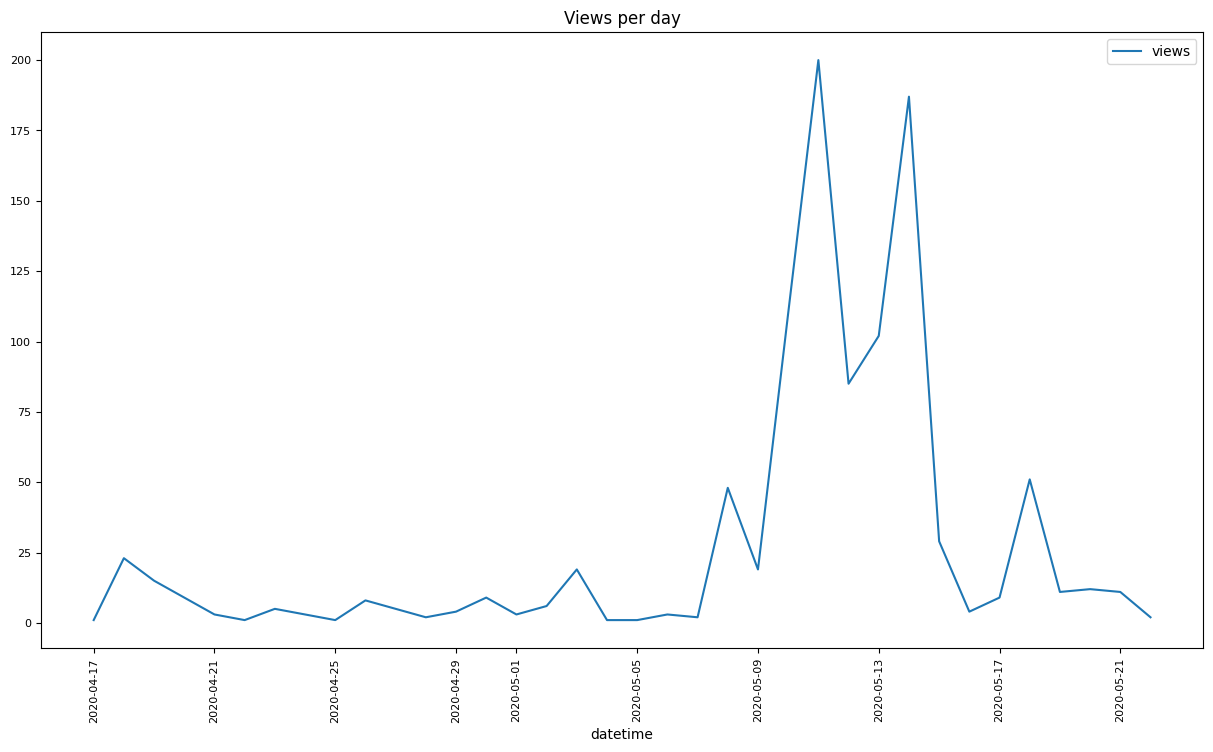

In [3]:
df.plot(
    kind='line',
    figsize=(15, 8),
    title='Views per day',
    fontsize=8,
    rot=90  # rotate x-axis tick labels
)